In [1]:
import pandas as pd
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_11772\432526209.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import numpy as np

In [3]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('student-mat.csv')
data

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,3,4,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,3,10,7,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,5,2,15,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,11,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,2,3,14,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,10,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,5,0,11,10


In [26]:
columns = data.columns[:-1]
list(columns)

['school',
 'gender',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'G1']

In [13]:
#мы хотим предсказывать G3

<Axes: >

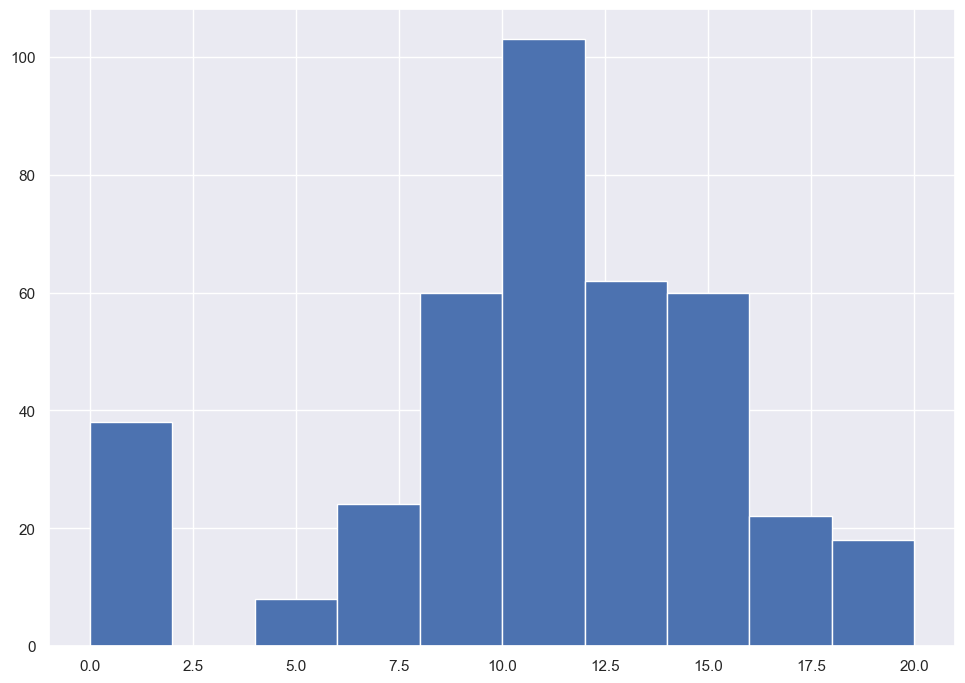

In [14]:
data['G3'].hist()

In [15]:
#0 является аномалией

In [16]:
#G1 оценка за 1 полугодие 

<Axes: >

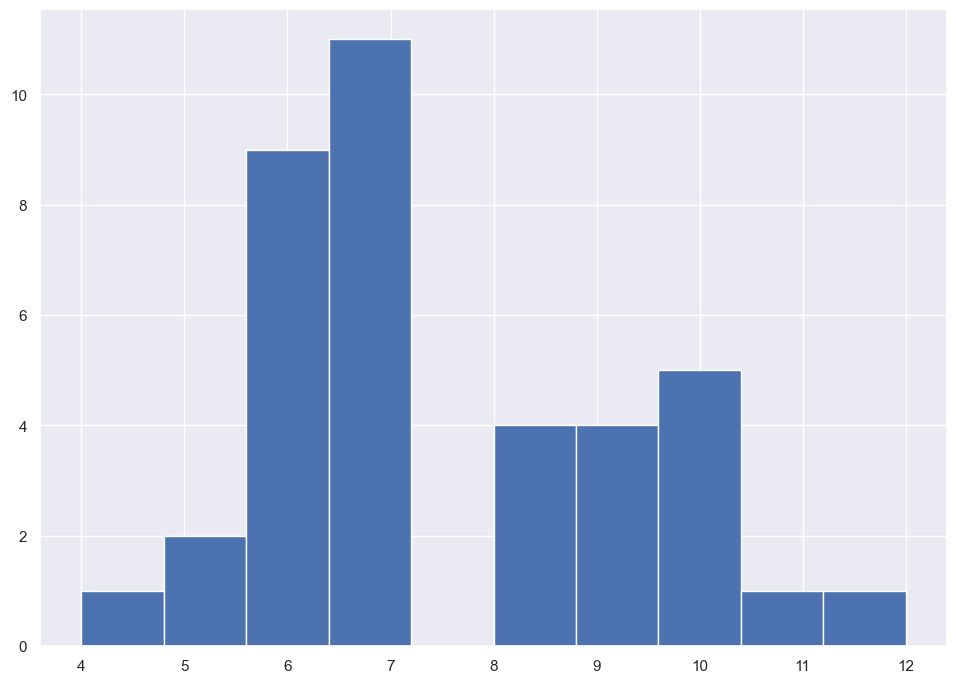

In [18]:
data[data['G3']==0]['G1'].hist()

In [19]:
#здесь в среднем 7 и вообще нет 0

<Axes: >

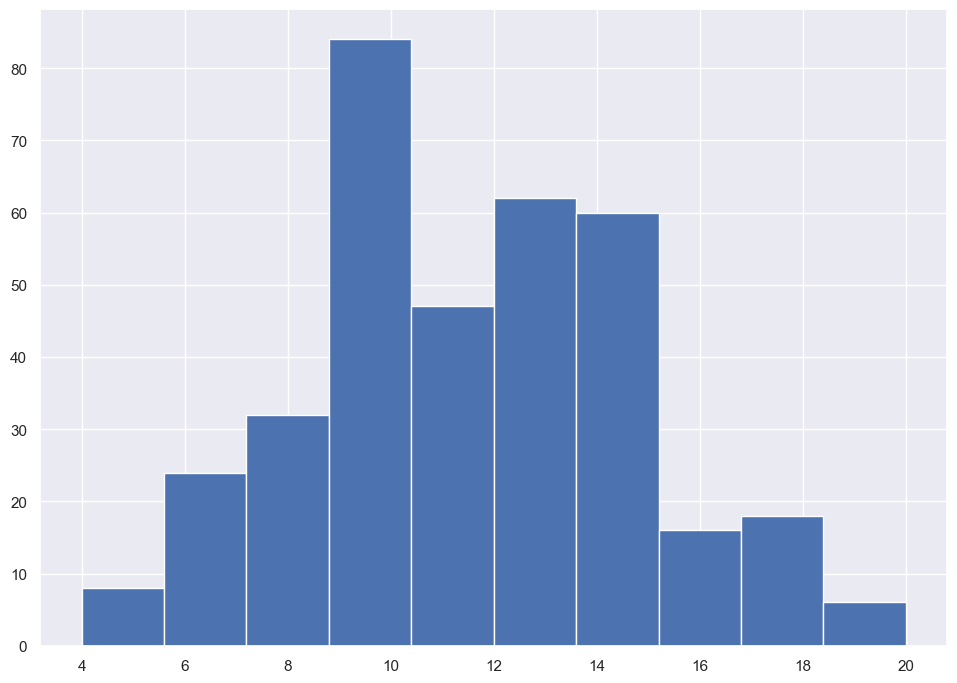

In [20]:
#поэтому исключим тех у кого оценка 0 
data = data[data['G3']!=0]
data['G3'].hist()

In [21]:
#подготовим данные для обучения лмодели линейной регрессии

In [27]:
X = data[list(columns)]
X

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,G1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,yes,no,no,4,3,4,3,6,5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,yes,yes,no,5,3,3,3,4,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,yes,no,4,3,2,3,10,7
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,yes,3,2,2,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,yes,no,no,4,3,2,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,yes,no,no,5,5,4,4,11,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,yes,yes,no,2,4,5,2,3,14
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,yes,no,no,5,5,3,3,3,10
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,yes,yes,no,4,4,1,5,0,11


In [30]:
Y = data["G3"]
Y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 357, dtype: int64

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 50,random_state = 0)

In [32]:
len(X_train)

307

In [34]:
len(X_test)

50

In [35]:
X_y_train = X_train.copy(deep = True)

In [36]:
X_y_train['y'] = y_train

In [37]:
X_y_train

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,y
295,GP,M,17,U,GT3,T,3,3,health,other,...,yes,yes,no,4,4,3,5,4,14,11
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,yes,yes,no,5,3,2,5,0,13,14
197,GP,M,16,R,LE3,T,3,3,teacher,other,...,yes,yes,no,3,3,4,3,8,9,10
231,GP,M,17,R,GT3,T,2,2,other,other,...,yes,yes,no,4,5,2,1,4,11,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,4,1,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MS,F,17,U,LE3,A,3,2,services,other,...,yes,no,yes,1,2,3,5,2,12,11
210,GP,F,19,U,GT3,T,3,3,other,other,...,yes,yes,no,4,3,3,3,10,8,8
117,GP,M,16,U,GT3,T,3,3,other,services,...,yes,yes,no,5,4,2,5,0,13,13
47,GP,M,16,U,GT3,T,4,3,health,services,...,yes,yes,no,4,2,2,2,4,19,20


In [51]:
X_y_train.corr(numeric_only = True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,y
age,1.000000,-0.143667,-0.152028,0.124947,-0.012044,0.265867,0.105719,0.018381,0.127471,-0.066960,0.232719,-0.058061,-0.163554
Medu,-0.143667,1.000000,0.622469,-0.189125,0.059405,-0.217911,-0.005481,-0.021037,0.080858,-0.030022,0.052977,0.180870,0.205427
Fedu,-0.152028,0.622469,1.000000,-0.194381,-0.031392,-0.265805,-0.031753,-0.054498,0.029325,-0.007715,-0.015996,0.160996,0.150231
traveltime,0.124947,-0.189125,-0.194381,1.000000,-0.105084,0.131414,-0.002823,-0.007708,0.062239,0.016959,0.028547,-0.119743,-0.131757
studytime,-0.012044,0.059405,-0.031392,-0.105084,1.000000,-0.136720,0.063829,-0.132218,-0.018720,-0.087165,-0.098216,0.156326,0.158553
failures,0.265867,-0.217911,-0.265805,0.131414,-0.136720,1.000000,-0.020901,0.133293,0.195804,0.042964,0.161519,-0.326272,-0.311091
famrel,0.105719,-0.005481,-0.031753,-0.002823,0.063829,-0.020901,1.000000,0.183048,0.068130,0.140506,-0.073748,0.052678,0.075401
freetime,0.018381,-0.021037,-0.054498,-0.007708,-0.132218,0.133293,0.183048,1.000000,0.255339,0.086641,-0.074686,-0.023542,-0.051553
goout,0.127471,0.080858,0.029325,0.062239,-0.018720,0.195804,0.068130,0.255339,1.000000,-0.061314,0.057467,-0.170340,-0.196119
health,-0.066960,-0.030022,-0.007715,0.016959,-0.087165,0.042964,0.140506,0.086641,-0.061314,1.000000,-0.057903,-0.074392,-0.071237


In [52]:
corr_y = X_y_train.corr(numeric_only = True)['y']
corr_y

age          -0.163554
Medu          0.205427
Fedu          0.150231
traveltime   -0.131757
studytime     0.158553
failures     -0.311091
famrel        0.075401
freetime     -0.051553
goout        -0.196119
health       -0.071237
absences     -0.229859
G1            0.896589
y             1.000000
Name: y, dtype: float64

In [53]:
corr_y = corr_y[abs(corr_y)>0.1]

In [54]:
corr_y

age          -0.163554
Medu          0.205427
Fedu          0.150231
traveltime   -0.131757
studytime     0.158553
failures     -0.311091
goout        -0.196119
absences     -0.229859
G1            0.896589
y             1.000000
Name: y, dtype: float64

<Axes: xlabel='G1', ylabel='G3'>

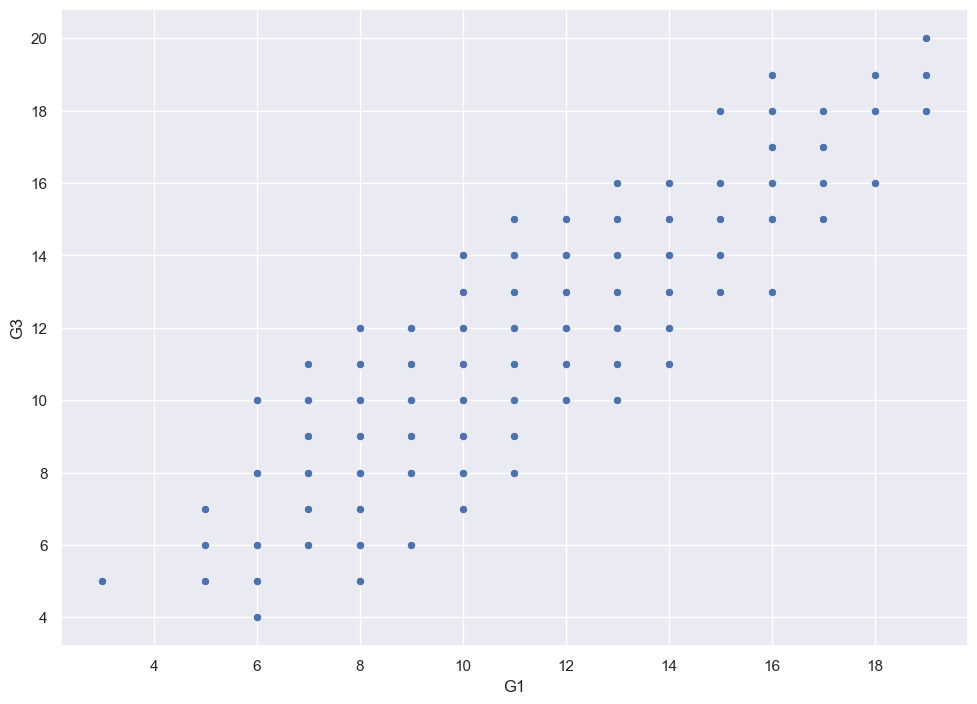

In [57]:
sns.scatterplot(x = X_y_train['G1'],y = Y)

In [58]:
#линейная зависимость очев

<Axes: xlabel='age', ylabel='G3'>

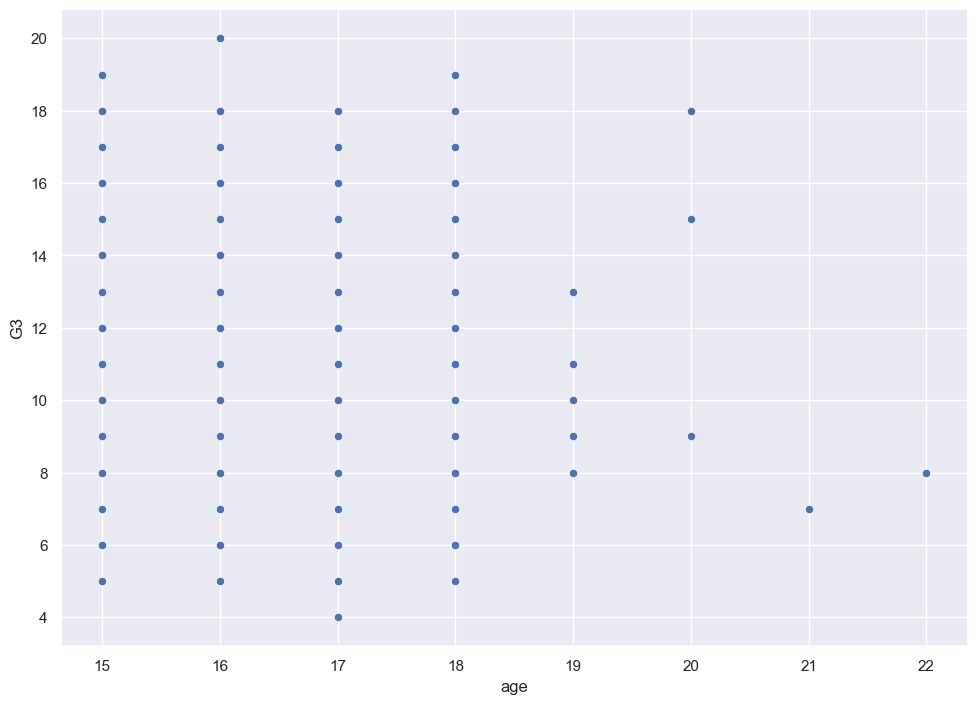

In [59]:
sns.scatterplot(x = X_y_train['age'],y = Y)

<Axes: xlabel='age', ylabel='G3'>

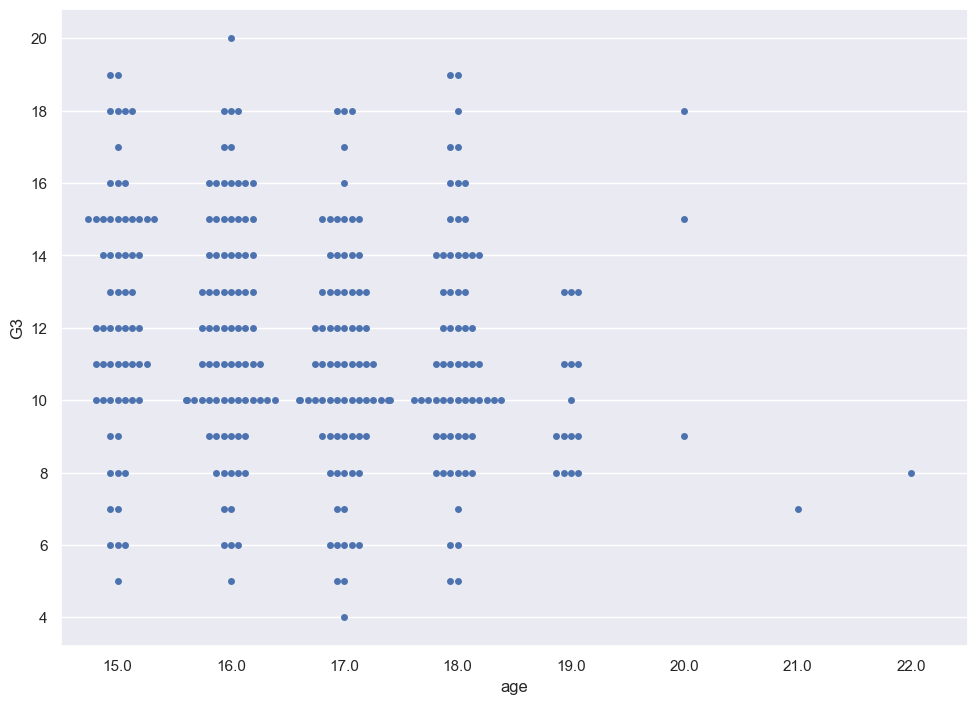

In [63]:
sns.swarmplot(x = X_y_train['age'],y = Y)

In [64]:
categorical_columns = ['school', 'gender', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                       'higher', 'internet', 'romantic']

In [65]:
numeric_factors_to_use = ['age', 'traveltime', 'G1', 'studytime', 'Medu', 'Fedu', 'failures']

In [66]:
#рассмотрим бинарную хар-ку higher(планирует ли в вуз)

In [68]:
X_y_train.groupby('higher',as_index = False).agg({"y":"mean"})

,higher,y
0,no,9.833333
1,yes,11.657627


In [69]:
#те кто ъотят в вуз учатся чуть лучше

In [70]:
interesting_categorical_factors = ['Mjob', 'Fjob', 'schoolsup', 'higher']

In [71]:
!pip3 install category_encoders

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   -------------------- ------------------- 41.0/81.9 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 918.2 kB/s eta 0:00:00


In [72]:
from category_encoders.target_encoder import TargetEncoder

In [73]:
mjob_target_encoder = TargetEncoder()
mjob_target_encoder.fit(X_y_train['Mjob'], X_y_train['y'])


TargetEncoder(cols=['Mjob'])

In [75]:
X_y_train['Mjob']

295      health
224     teacher
197     teacher
231       other
7         other
         ...   
357    services
210       other
117       other
47       health
190    services
Name: Mjob, Length: 307, dtype: object

In [76]:
mjob_target_encoder.transform(X_y_train['Mjob'],X_y_train['y'])

,Mjob
295,12.781907
224,11.734708
197,11.734708
231,10.963057
7,10.963057
...,...
357,12.251790
210,10.963057
117,10.963057
47,12.781907


In [77]:
#по профессии мамы мы получили численную характеристику - среднее y 

In [78]:
# остальные 
fjob_target_encoder = TargetEncoder()
fjob_target_encoder.fit(X_y_train['Fjob'], X_y_train['y'])

schoolsup_target_encoder = TargetEncoder()
schoolsup_target_encoder.fit(X_y_train['schoolsup'], X_y_train['y'])

higher_target_encoder = TargetEncoder()
higher_target_encoder.fit(X_y_train['higher'], X_y_train['y'])

TargetEncoder(cols=['higher'])

In [79]:
X_y_train['Mjob_encoded'] = mjob_target_encoder.transform(X_y_train['Mjob'])
X_y_train['Fjob_encoded'] = fjob_target_encoder.transform(X_y_train['Fjob'])
X_y_train['schoolsup_encoded'] = schoolsup_target_encoder.transform(X_y_train['schoolsup'])
X_y_train['higher_encoded'] = higher_target_encoder.transform(X_y_train['higher'])

In [80]:
X_y_train

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,health,absences,G1,y,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,GP,M,17,U,GT3,T,3,3,health,other,...,4,3,5,4,14,11,12.781907,11.339181,11.835821,11.657627
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,3,2,5,0,13,14,11.734708,11.476373,11.835821,11.657627
197,GP,M,16,R,LE3,T,3,3,teacher,other,...,3,4,3,8,9,10,11.734708,11.339181,11.835821,11.657627
231,GP,M,17,R,GT3,T,2,2,other,other,...,5,2,1,4,11,11,10.963057,11.339181,11.835821,11.657627
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,6,6,6,10.963057,12.723082,10.094869,11.657627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MS,F,17,U,LE3,A,3,2,services,other,...,2,3,5,2,12,11,12.251790,11.339181,11.835821,11.657627
210,GP,F,19,U,GT3,T,3,3,other,other,...,3,3,3,10,8,8,10.963057,11.339181,11.835821,11.657627
117,GP,M,16,U,GT3,T,3,3,other,services,...,4,2,5,0,13,13,10.963057,11.476373,11.835821,11.657627
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,2,4,19,20,12.781907,11.476373,11.835821,11.657627


In [81]:
X_y_train

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,health,absences,G1,y,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,GP,M,17,U,GT3,T,3,3,health,other,...,4,3,5,4,14,11,12.781907,11.339181,11.835821,11.657627
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,3,2,5,0,13,14,11.734708,11.476373,11.835821,11.657627
197,GP,M,16,R,LE3,T,3,3,teacher,other,...,3,4,3,8,9,10,11.734708,11.339181,11.835821,11.657627
231,GP,M,17,R,GT3,T,2,2,other,other,...,5,2,1,4,11,11,10.963057,11.339181,11.835821,11.657627
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,6,6,6,10.963057,12.723082,10.094869,11.657627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MS,F,17,U,LE3,A,3,2,services,other,...,2,3,5,2,12,11,12.251790,11.339181,11.835821,11.657627
210,GP,F,19,U,GT3,T,3,3,other,other,...,3,3,3,10,8,8,10.963057,11.339181,11.835821,11.657627
117,GP,M,16,U,GT3,T,3,3,other,services,...,4,2,5,0,13,13,10.963057,11.476373,11.835821,11.657627
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,2,4,19,20,12.781907,11.476373,11.835821,11.657627


In [82]:
#в конце после y появятся новые колонки

In [83]:
factors_to_use = numeric_factors_to_use + ['Mjob_encoded', 'Fjob_encoded', 'schoolsup_encoded', 'higher_encoded']

In [84]:
X_train_encoded = X_y_train.copy(deep=True)

In [85]:
X_train_encoded = X_train_encoded[factors_to_use]

In [86]:
X_train_encoded

,age,traveltime,G1,studytime,Medu,Fedu,failures,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,17,1,14,1,3,3,0,12.781907,11.339181,11.835821,11.657627
224,16,1,13,3,4,4,0,11.734708,11.476373,11.835821,11.657627
197,16,3,9,1,3,3,0,11.734708,11.339181,11.835821,11.657627
231,17,2,11,2,2,2,0,10.963057,11.339181,11.835821,11.657627
7,17,2,6,2,4,4,0,10.963057,12.723082,10.094869,11.657627
...,...,...,...,...,...,...,...,...,...,...,...
357,17,2,12,2,3,2,0,12.251790,11.339181,11.835821,11.657627
210,19,1,8,4,3,3,0,10.963057,11.339181,11.835821,11.657627
117,16,2,13,1,3,3,0,10.963057,11.476373,11.835821,11.657627
47,16,1,19,4,4,3,0,12.781907,11.476373,11.835821,11.657627


In [87]:
scaler = MinMaxScaler()
scaler.fit(X_train_encoded)

MinMaxScaler()

In [88]:
X_train_scaled = scaler.transform(X_train_encoded)

In [89]:
X_train_scaled

array([[0.28571429, 0.        , 0.6875    , ..., 0.        , 1.        ,
        1.        ],
       [0.14285714, 0.        , 0.625     , ..., 0.09913411, 1.        ,
        1.        ],
       [0.14285714, 0.66666667, 0.375     , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.14285714, 0.33333333, 0.625     , ..., 0.09913411, 1.        ,
        1.        ],
       [0.14285714, 0.        , 1.        , ..., 0.09913411, 1.        ,
        1.        ],
       [0.14285714, 0.        , 0.5       , ..., 0.09913411, 1.        ,
        1.        ]])

In [90]:
model = LinearRegression()

In [91]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [92]:
model.score(X_train_scaled, y_train)

0.8206863785263498

In [93]:
#на обучаещей выборке у нас точностьь модели R^2 = 0.82

In [94]:
#тестим на тестовой выберке

In [95]:
X_test['Mjob_encoded'] = mjob_target_encoder.transform(X_test['Mjob'])
X_test['Fjob_encoded'] = fjob_target_encoder.transform(X_test['Fjob'])
X_test['schoolsup_encoded'] = schoolsup_target_encoder.transform(X_test['schoolsup'])
X_test['higher_encoded'] = higher_target_encoder.transform(X_test['higher'])

In [96]:
X_test_encoded = X_test[factors_to_use]

In [100]:
X_test_encoded.head(5)

,age,traveltime,G1,studytime,Medu,Fedu,failures,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
6,16,1,12,2,2,2,0,10.963057,11.339181,11.835821,11.657627
152,15,2,10,3,3,3,2,12.251790,11.476373,11.835821,11.657627
330,18,1,9,4,2,2,0,10.963057,11.339181,11.835821,11.657627
240,17,2,12,2,4,3,0,12.781907,11.339181,11.835821,11.657627
90,16,1,7,3,3,3,0,10.963057,11.339181,11.835821,11.657627


In [101]:
X_test_scaled = scaler.transform(X_test_encoded)

In [102]:
model.score(X_test_scaled, y_test)

0.7278059083711641

In [103]:
#точность меньше 

In [104]:
model.predict(X_test_scaled)

array([12.28973536, 11.16057207,  9.22847546, 12.4171255 ,  7.96640494,
        7.58879649, 10.43342026, 10.87751139, 14.94288024, 15.30810275,
       12.50292408, 12.62678505, 14.26557074, 14.11290565,  9.08506111,
       11.07263249, 13.92266825, 14.04234316, 15.97583319, 12.24577748,
        6.69736088, 15.73123848,  8.9811407 , 10.87325769,  7.8918567 ,
       12.94246639, 12.40655858,  8.62095996, 14.31107984,  7.88097415,
        7.67250753,  7.8969954 , 12.17297401,  8.88633288, 10.73263861,
       14.10612511, 12.05292006,  7.93129161, 11.66573143, 18.12350829,
       13.70410088, 12.85960961, 15.16757594,  9.28737376,  7.00744211,
       13.65554177,  8.18414173,  9.23857638, 11.22469894, 13.39906456])

In [105]:
def score_model(model, X_test, y_test):
    y_preds = model.predict(X_test)
    
    errs = []
    
    for y, y_pred in zip(y_test, y_preds):
        errs.append(abs(y - y_pred))
        
    mae = sum(errs) / len(errs)
    
    mean_y_test = sum(y_test) / len(y_test)
    r2 = 1 - sum(err ** 2 for err in errs) / sum((y - mean_y_test) ** 2 for y in y_test)
    
    return mae, r2

In [108]:
score_model(model,X_test_scaled,y_test)

(1.2899322007832241, 0.7278059083711641)

In [110]:
maes = []
r2s = []

X_y_test = X_test_encoded.copy(deep=True)
X_y_test['y'] = y_test

for i in range(1000):
    X_y_sample = X_y_test.sample(len(X_y_test), replace=True)
    
    X_test_sample = X_y_sample.drop(columns=['y'])
    X_test_sample = scaler.transform(X_test_sample)
    y_test_sample = X_y_sample['y']
    
    mae_sample, r2_sample = score_model(model, X_test_sample, y_test_sample)
    
    maes.append(mae_sample)
    r2s.append(r2_sample)

In [111]:
maes = list(sorted(maes))

In [112]:
maes = maes[25:975] # делаем 95% доверительный итнервал обрубаем 25 слева и 25 справа 25 + 25 = 50 = 0.05* 1000


In [114]:
maes[0],maes[-1]

(1.0675338852858665, 1.5265541591875496)

<Axes: >

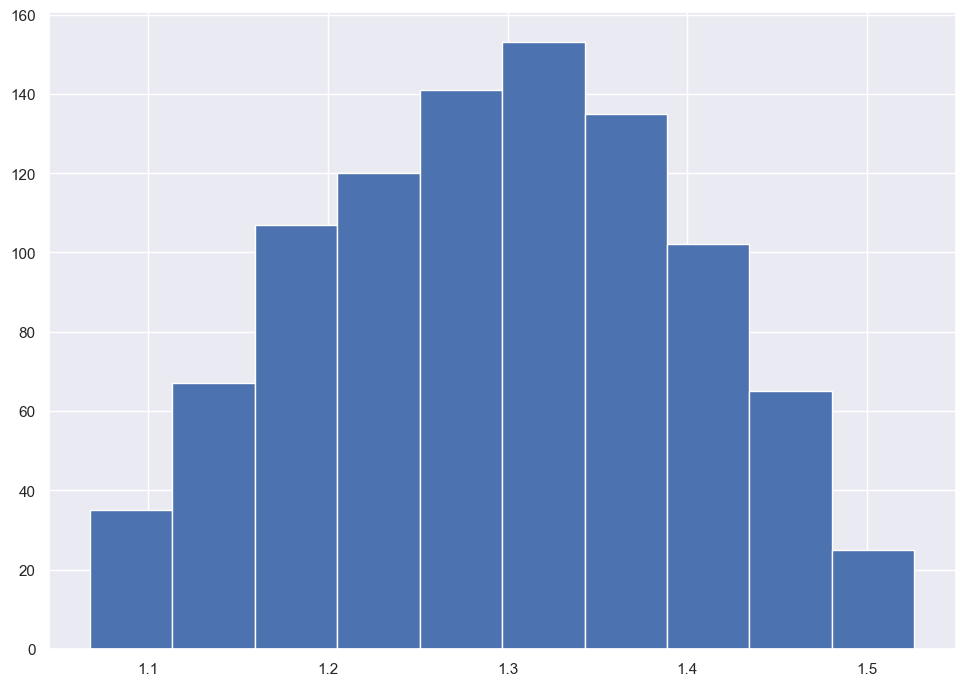

In [116]:
pd.Series(maes).hist()

In [117]:
#итнерпритация модели:

In [118]:
model.coef_

array([-2.06518364e+00, -1.01854381e-01,  1.40527065e+01,  2.45512549e-01,
        3.84307987e-01, -4.39096593e-01,  5.01665694e-02,  4.29031890e-01,
       -2.22934549e-03,  1.72824110e-01, -2.68099833e-01])

In [119]:
for x, y in zip(X_train_encoded.columns, model.coef_):
    print(x, round(y, 2))

age -2.07
traveltime -0.1
G1 14.05
studytime 0.25
Medu 0.38
Fedu -0.44
failures 0.05
Mjob_encoded 0.43
Fjob_encoded -0.0
schoolsup_encoded 0.17
higher_encoded -0.27


In [120]:
#G1 самый важный